In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    log_loss,
    classification_report,
)
from sklearn.preprocessing import LabelEncoder
import kagglehub

In [ ]:
path = kagglehub.dataset_download("abhinavmangalore/breast-cancer-dataset-wisconsin-diagnostic-uci")

print("Path to dataset files:", path)

#load dataset
df=pd.read_csv(f"{path}/breast-cancer-wisconsin-data.csv")
df.info()
df.head()

# Encode the target column (Diagnosis: M=1, B=0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

Path to dataset files: /root/.cache/kagglehub/datasets/abhinavmangalore/breast-cancer-dataset-wisconsin-diagnostic-uci/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radi

In [ ]:
# Define features and target
feature_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean'
]
X = df[feature_columns]
y = df['diagnosis']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy')  # Using 'entropy' for information gain
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Log Loss: {loss:.2f}")



Metrics:
Accuracy: 0.95
Precision: 0.93
Recall: 0.93
F1-Score: 0.93
Log Loss: 0.71



Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



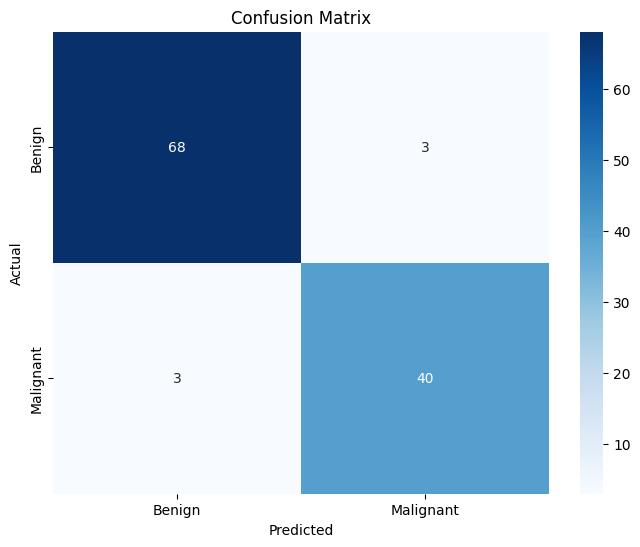

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant']
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


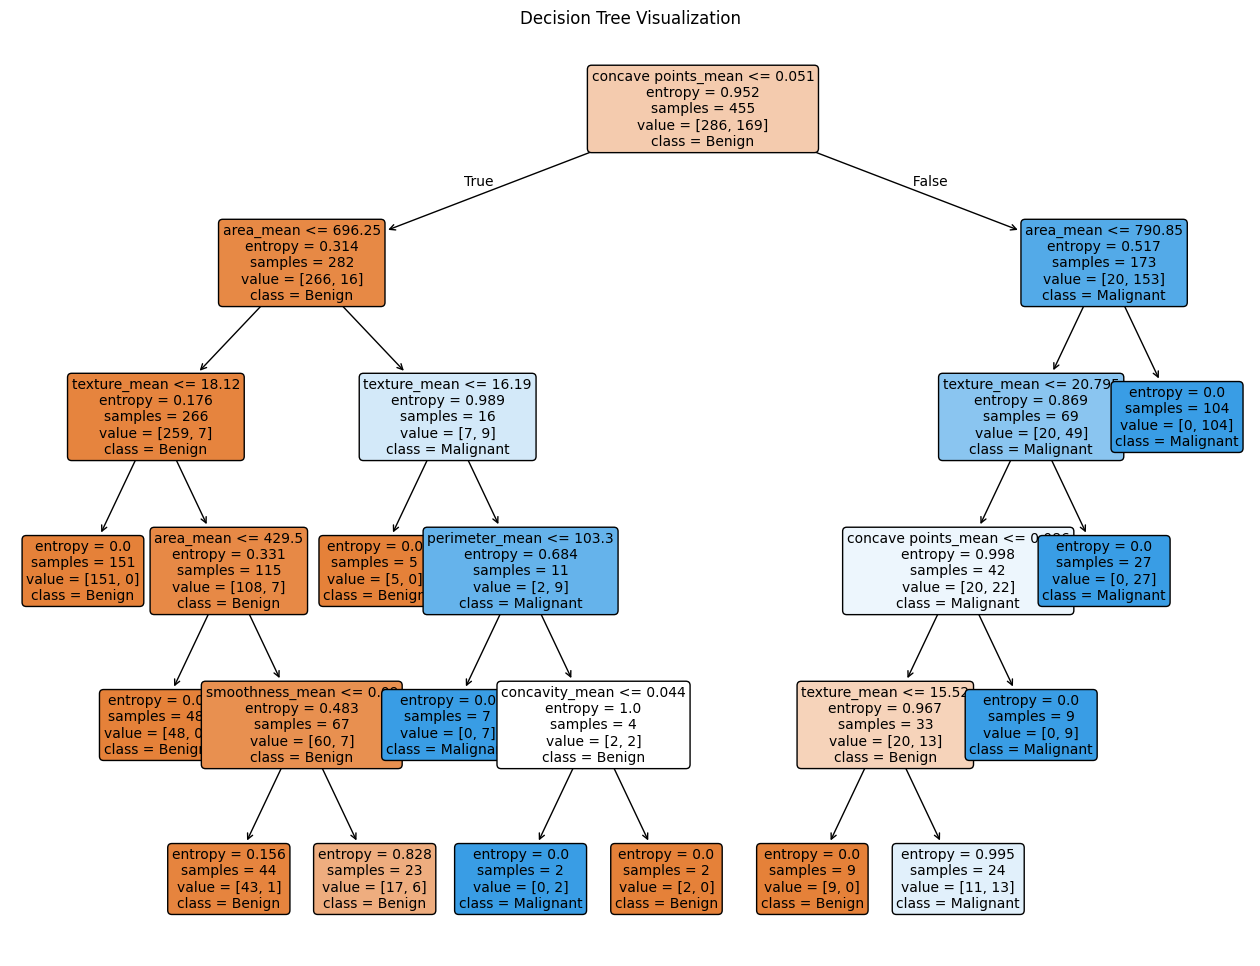

In [ ]:
# Visualizing the Decision Tree
plt.figure(figsize=(16, 12))
plot_tree(
    model,
    feature_names=feature_columns,
    class_names=['Benign', 'Malignant'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization')
plt.show()


K-Fold Cross-Validation Metrics:
Mean Accuracy: 0.92
Accuracy per Fold: [0.94736842 0.92105263 0.9122807  0.93859649 0.89380531]

Feature Importances:
                  Feature  Importance
7     concave points_mean    0.691581
3               area_mean    0.159849
1            texture_mean    0.112153
4         smoothness_mean    0.016784
6          concavity_mean    0.010437
2          perimeter_mean    0.009196
0             radius_mean    0.000000
5        compactness_mean    0.000000
8           symmetry_mean    0.000000
9  fractal_dimension_mean    0.000000


<ipython-input-12-f5c9f115f198>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


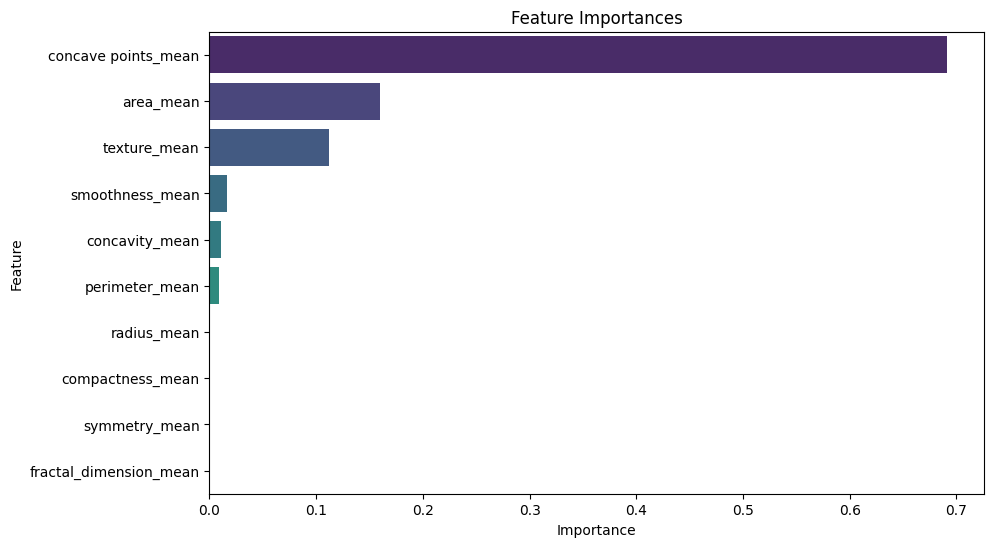

In [ ]:
# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print("\nK-Fold Cross-Validation Metrics:")
print(f"Mean Accuracy: {cv_results.mean():.2f}")
print(f"Accuracy per Fold: {cv_results}")

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

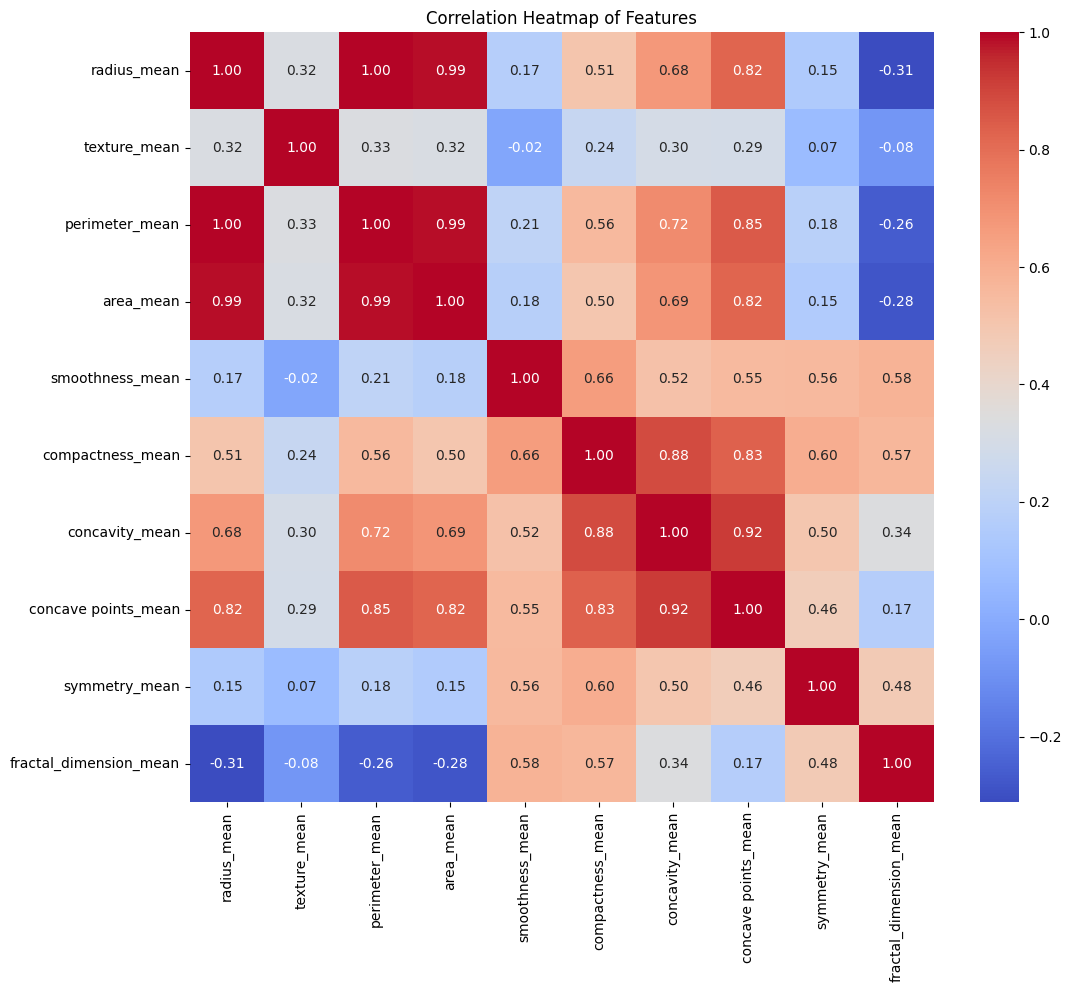

In [ ]:

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()
